### Imputing Missing Data
**Description**: Impute missing data using various strategies like mean, median, or mode.

Original Data with Missing Values:
         Age     Income  Score
0        NaN  26.905067    NaN
1  33.617357  44.242123   10.0
2  41.476885  46.000062    NaN
3  50.230299  36.556586    8.0
4        NaN  50.368055    1.0

Missing Value Counts:
Age       13
Income    17
Score     20
dtype: int64

Imputing with MEAN strategy:
         Age     Income  Score
0  33.521313  26.905067    5.9
1  33.617357  44.242123   10.0
2  41.476885  46.000062    5.9
3  50.230299  36.556586    8.0
4  33.521313  50.368055    1.0


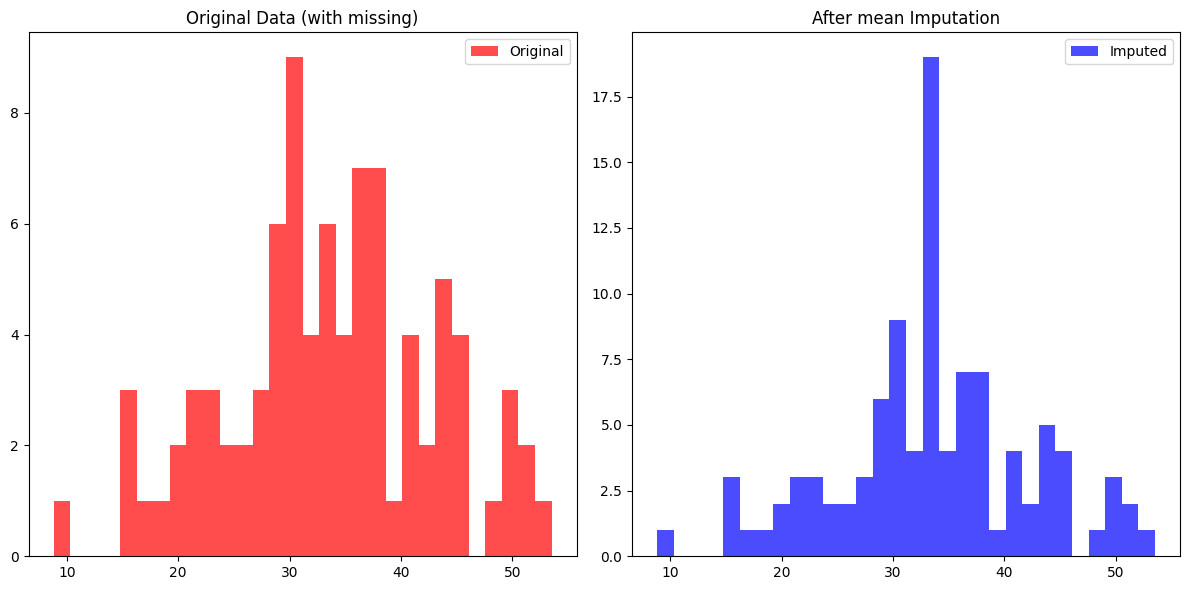


Imputing with MEDIAN strategy:
         Age     Income  Score
0  32.803281  26.905067    6.0
1  33.617357  44.242123   10.0
2  41.476885  46.000062    6.0
3  50.230299  36.556586    8.0
4  32.803281  50.368055    1.0


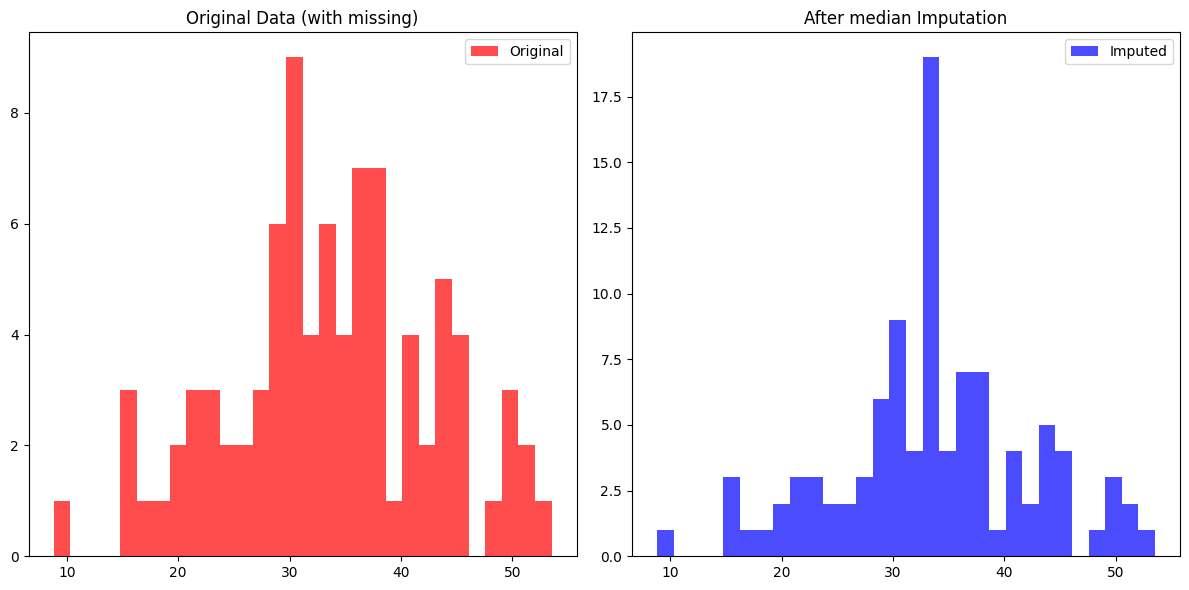


Imputing with MOST_FREQUENT strategy:
         Age     Income  Score
0   8.802549  26.905067   10.0
1  33.617357  44.242123   10.0
2  41.476885  46.000062   10.0
3  50.230299  36.556586    8.0
4   8.802549  50.368055    1.0


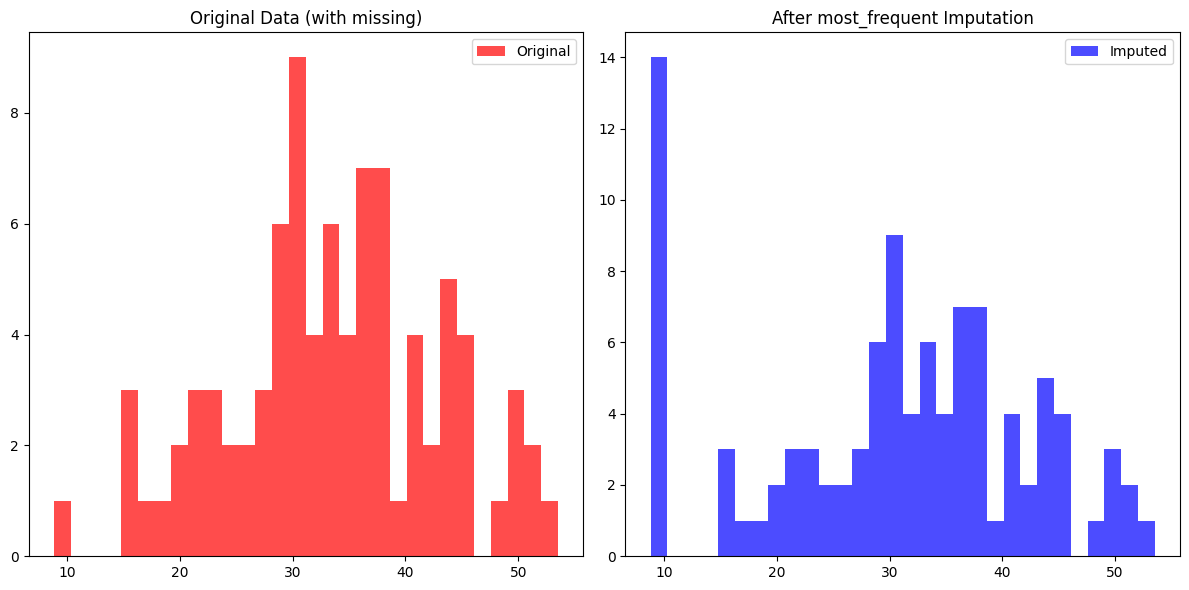


Imputing with KNN strategy:
         Age     Income  Score
0  31.087004  26.905067    8.0
1  33.617357  44.242123   10.0
2  41.476885  46.000062    4.6
3  50.230299  36.556586    8.0
4  37.064029  50.368055    1.0


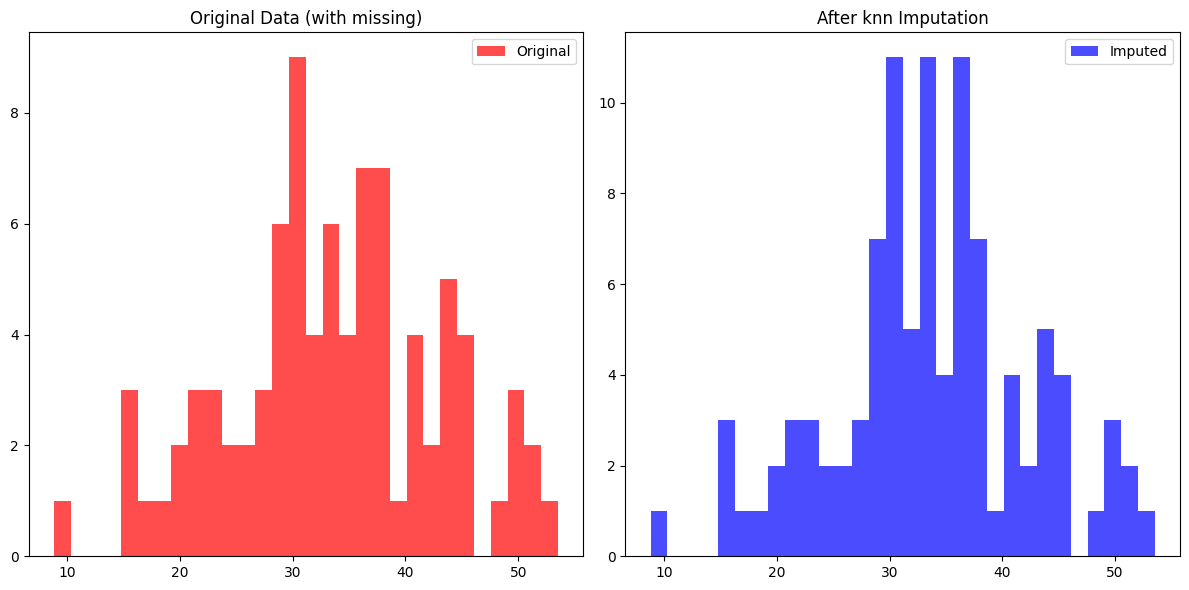


Imputing with MICE strategy:
         Age     Income      Score
0  33.627174  26.905067   6.282196
1  33.617357  44.242123  10.000000
2  41.476885  46.000062   6.030758
3  50.230299  36.556586   8.000000
4  33.557782  50.368055   1.000000


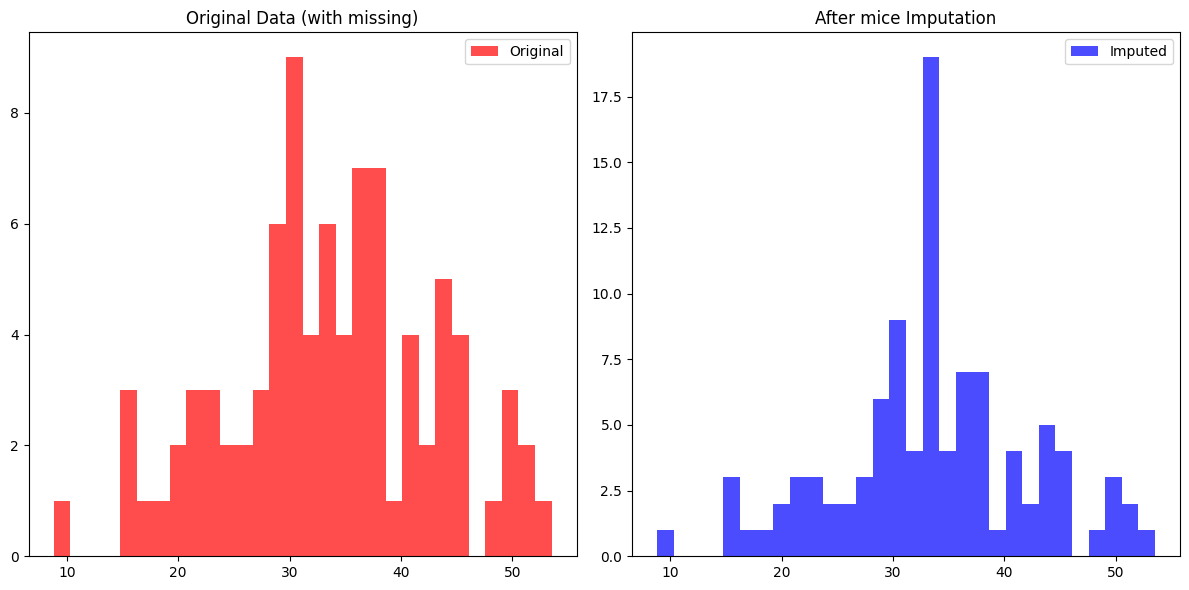

In [1]:
# Write your code from here
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
def impute_missing_data(data, strategy='mean', n_neighbors=5):
    data_copy = data.copy()
    if strategy in ['mean', 'median', 'most_frequent', 'constant']:
        imputer = SimpleImputer(strategy=strategy, fill_value=0 if strategy=='constant' else None)
        imputed_data = imputer.fit_transform(data_copy)
    elif strategy == 'knn':
        imputer = KNNImputer(n_neighbors=n_neighbors)
        imputed_data = imputer.fit_transform(data_copy)
    elif strategy == 'mice':
        imputer = IterativeImputer(max_iter=10, random_state=42)
        imputed_data = imputer.fit_transform(data_copy)
    else:
        raise ValueError("Invalid strategy. Choose from: mean, median, most_frequent, constant, knn, mice")
    return pd.DataFrame(imputed_data, columns=data.columns)
def visualize_missing_data(original, imputed, column_name, strategy):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(original[column_name].dropna(), bins=30, alpha=0.7, color='red', label='Original')
    plt.title(f'Original Data (with missing)')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.hist(imputed[column_name], bins=30, alpha=0.7, color='blue', label='Imputed')
    plt.title(f'After {strategy} Imputation')
    plt.legend()
    plt.tight_layout()
    plt.show()
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.normal(35, 10, 100),
    'Income': np.random.lognormal(4, 0.5, 100),
    'Score': np.random.randint(1, 11, 100)
})
for col in data.columns:
    mask = np.random.choice([True, False], size=len(data), p=[0.2, 0.8])
    data.loc[mask, col] = np.nan
print("Original Data with Missing Values:")
print(data.head())
print("\nMissing Value Counts:")
print(data.isnull().sum())
strategies = ['mean', 'median', 'most_frequent', 'knn', 'mice']
for strategy in strategies:
    print(f"\nImputing with {strategy.upper()} strategy:")
    imputed_data = impute_missing_data(data, strategy=strategy)
    print(imputed_data.head())
    visualize_missing_data(data, imputed_data, 'Age', strategy)